<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-science/ML_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/'ML-intro'

/content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/ML-intro


In [ ]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skl_ms 
## Support Vector Machines ==> support vector classifier === clasificador de vectores de soporte
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix



In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
## df['Outcome'].value_counts()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
lista_caract_x = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

## x = todas las col menos Outcome
X = df[lista_caract_x]
## y = solo la col outcome
lista_caract_y = ['Outcome']
y = df[lista_caract_y]

In [ ]:
## esta funcion arma el algoritmo de prediccion
X_train, X_test, y_train, y_test = skl_ms.train_test_split(X,y)
 

In [ ]:
y_train.shape

(576, 1)

In [ ]:
clasificador_lineal = SVC(kernel='linear')

In [ ]:
hora_inicio = time()

## esta funcion inicia el aprendizaje
clasificador_lineal.fit(X_train.values, y_train.values.ravel())
print(time() - hora_inicio)

4.073678016662598


In [ ]:
hora_inicio = time()

y_pred = clasificador_lineal.predict(X_test)

print(time() - hora_inicio)


0.007946491241455078


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
accuracy_score(y_test, y_pred)

0.7604166666666666

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


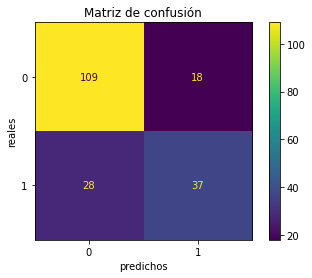

In [ ]:
plot_confusion_matrix(clasificador_lineal, X_test, y_test)
plt.title('Matriz de confusión')
plt.ylabel('reales')
plt.xlabel('predichos')
plt.show()



### **  **

### **EJEMPLO DE REGRESION LINEAL CON DATASET DE DIGITOS EN FORMA DE IMAGENES (PIXELES)**

In [ ]:
df_digitos = pd.read_csv("digitos.csv")

In [ ]:
df_digitos.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

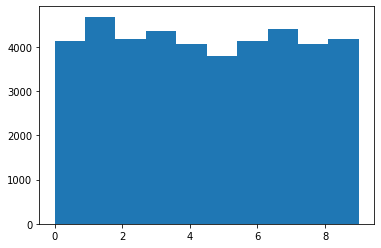

In [ ]:
plt.hist(df_digitos['label'])

In [ ]:
pixeles = df_digitos.iloc[:,1:785]
digitos = df_digitos.iloc[:,0:1]

In [ ]:
## esta funcion arma el algoritmo de prediccion
X_train, X_test, y_train, y_test = skl_ms.train_test_split( pixeles, digitos, test_size=0.25 )

In [ ]:
def img(info):
  matriz = np.array(info.values)
  plt.imshow(matriz.reshape(28,28))

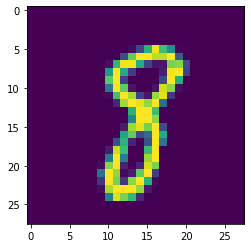

In [ ]:
img(X_test.iloc[80])

In [ ]:
modelo = SVC(kernel='lineal')

In [ ]:
digitos.groupby(by='label').sum()

""
label
0
1
2
3
4
5
6
7
8
